<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# **Exploratory Data Analysis Lab**

Estimated time needed: **30** minutes

In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.

## Objectives

In this lab you will perform the following:

*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.

***

## Hands on Lab

Import the pandas module.

In [2]:
import pandas as pd

Load the dataset into a dataframe.

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution

### Determine how the data is distributed

The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.

Plot the distribution curve for the column `ConvertedComp`.

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ConvertedComp', ylabel='Density'>

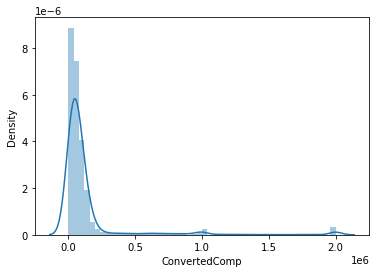

In [12]:
# your code goes here
import seaborn as sns

sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.

<AxesSubplot:ylabel='Frequency'>

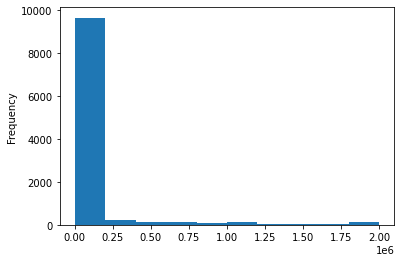

In [7]:
# your code goes here
df['ConvertedComp'].plot(kind = 'hist')

What is the median of the column `ConvertedComp`?

In [13]:
# your code goes here
df['ConvertedComp'].dropna(axis = 0, inplace = True)
print("The Median of ConvertedComp is",df['ConvertedComp'].median())

The Median of ConvertedComp is 57745.0


How many responders identified themselves only as a **Man**?

In [41]:
# your code goes here
df['Gender'].value_counts()
df['Age'].median()

29.0

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?

In [17]:
# your code goes here
df_woman = df[df['Gender'] == 'Woman']
print("The Median is", df_woman['ConvertedComp'].median())

The Median is 57708.0


Give the five number summary for the column `Age`?

**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->

In [25]:
df["Age"].describe()

count 11111.000000
mean 30.778895
std 7.393686
min 16.000000
25% 25.000000
50% 29.000000
75% 35.000000
max 99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.

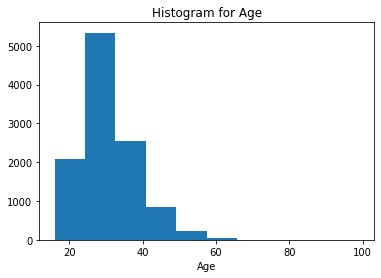

In [29]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['Age'])
plt.title("Histogram for Age")
plt.xlabel("Age")
plt.show()

## Outliers

### Finding outliers

Find out if outliers exist in the column `ConvertedComp` using a box plot?

<AxesSubplot:>

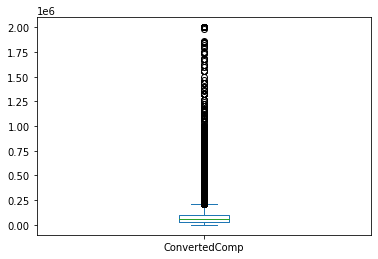

In [30]:
# your code goes here
df['ConvertedComp'].plot(kind = 'box')

Find out the Inter Quartile Range for the column `ConvertedComp`.

In [42]:
# your code goes here
df['ConvertedComp'].dropna(axis = 0, inplace = True)

Q1 = df['ConvertedComp'].quantile(0.25)
Q2 = df['ConvertedComp'].quantile(0.50)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

print("The Inter Quartile Range (IQR) is", IQR)
print("The Median is", Q2)

The Inter Quartile Range (IQR) is 73132.0
The Median is 57745.0


Find out the upper and lower bounds.

In [32]:
# your code goes here
upper = Q3 + (IQR *1.5)
lower = Q1 - (IQR *1.5)

print("The Upper Bound is", upper)
print("The Lower Bound is", lower)

The Upper Bound is 209698.0
The Lower Bound is -82830.0


Identify how many outliers are there in the `ConvertedComp` column.

In [37]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)

0 False
1 False
2 False
3 True
4 False
 ... 
11393 False
11394 False
11395 False
11396 False
11397 False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [38]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper,lower)
df2.describe()

count 10582.000000
mean 72327.661406
std 58619.926538
min 0.000000
25% 26868.000000
50% 57745.000000
75% 100000.000000
max 209698.000000
Name: ConvertedComp, dtype: float64

## Correlation

### Finding correlation

Find the correlation between `Age` and all other numerical columns.

In [40]:
# your code goes here
print(df.corr)

<bound method DataFrame.corr of        Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   
11397       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than

## Authors

Ramesh Sannareddy

### Other Contributors

Rav Ahuja

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |

Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).